In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [2]:
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_pmip3_ipsl_hist_null.csv', delimiter=",", dtype=float).flatten()
is_plateau = np.genfromtxt('is_plateau.csv', delimiter=",", dtype=float).flatten()
volc = -np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
volc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()

In [3]:
delphi_hist_wrap = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_wrap = ( delphi_hist_null + np.pi) % (2 * np.pi )
delphi_green = delphi_hist_wrap[is_plateau==1.0]
delphi_white = delphi_hist_wrap[is_plateau==0.0]

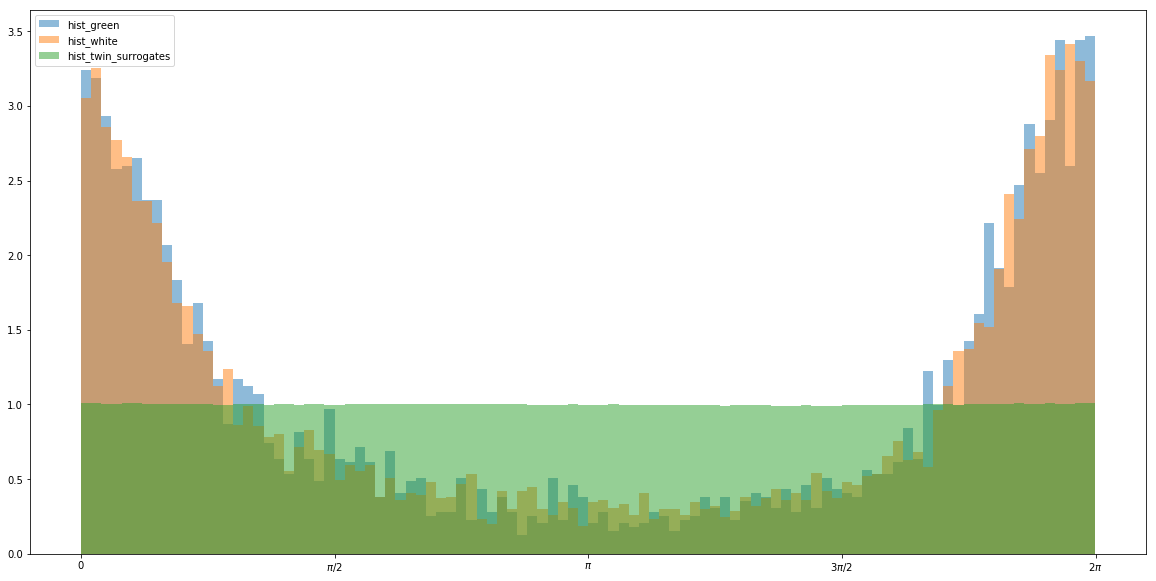

In [4]:
plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_green/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_green')
_, _, _ = plt.hist(delphi_white/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_white')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.legend()

In [5]:
delphi_hist_wrap_inst = np.diff(delphi_hist_wrap, n=1)
delphi_hist_null_wrap_inst = np.diff(delphi_hist_null_wrap, n=1)
delphi_green_inst = delphi_hist_wrap_inst[is_plateau[:-1]==1.0]
delphi_white_inst = delphi_hist_wrap_inst[is_plateau[:-1]==0.0]

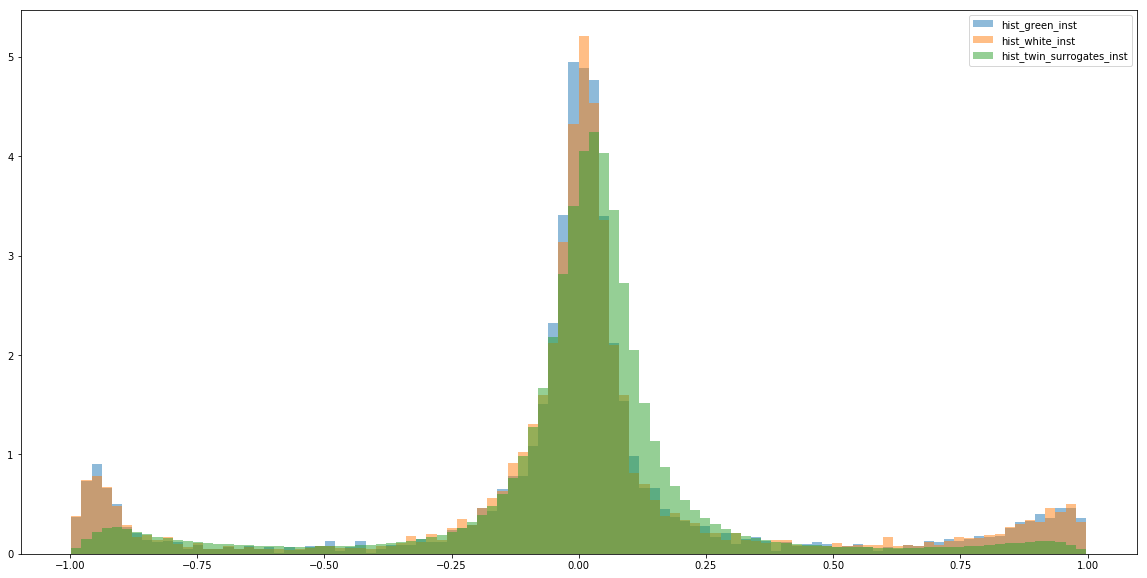

In [6]:
plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_green_inst/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_green_inst')
_, _, _ = plt.hist(delphi_white_inst/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_white_inst')
_, _, _ = plt.hist(delphi_hist_null_wrap_inst/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates_inst')
#plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.legend()

In [7]:
nino3_data = np.genfromtxt('tas_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_nino3_tseries.csv', delimiter=",", dtype=float).flatten()
ismr_data = np.genfromtxt('pr_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_goswami_india_tseries.csv', delimiter=",", dtype=float).flatten()*86400

nino3 = nino3_data - np.mean(nino3_data)
ismr = (ismr_data - np.mean(ismr_data))/np.std(ismr_data)

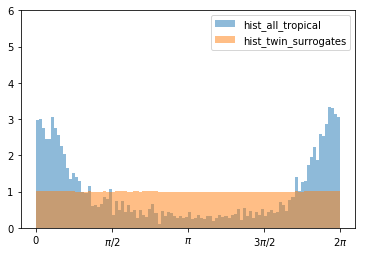

In [8]:
# All Tropical Eruptions 
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    #if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
    #    continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_tropical')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

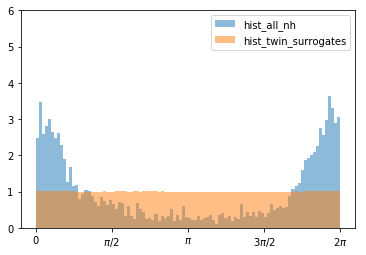

In [9]:
# All NH Eruptions 
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    #if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
    #    continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_nh')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

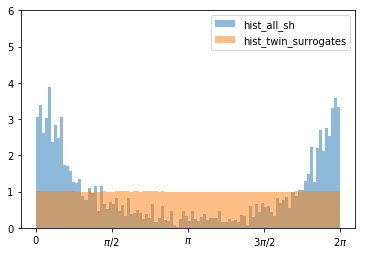

In [10]:
# All SH Eruptions 
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    #if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
    #    continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_sh')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

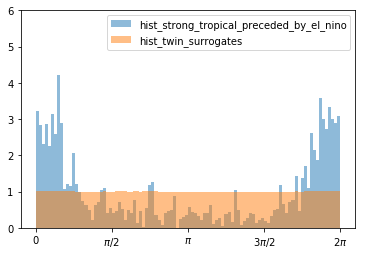

In [11]:
# Strong Tropical Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_strong_tropical_preceded_by_el_nino')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

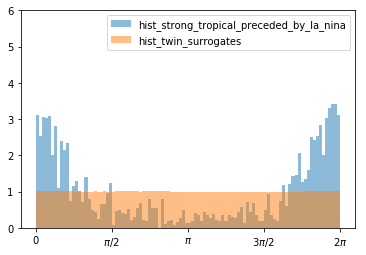

In [12]:
# Strong Tropical Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_strong_tropical_preceded_by_la_nina')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

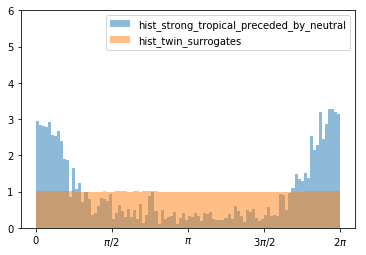

In [13]:
# Strong Tropical Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_strong_tropical_preceded_by_neutral')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

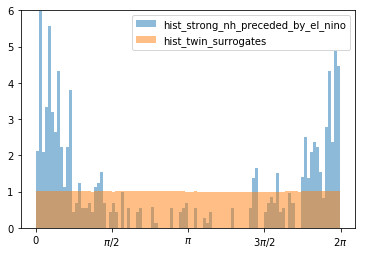

In [14]:
# Strong NH Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_strong_nh_preceded_by_el_nino')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

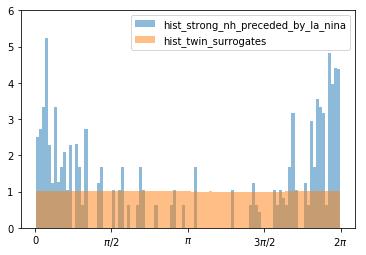

In [15]:
# Strong NH Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_strong_nh_preceded_by_la_nina')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

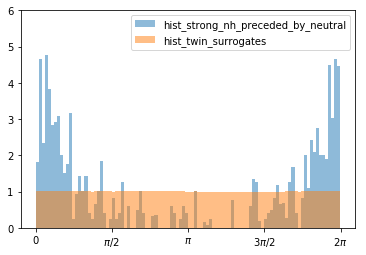

In [16]:
# Strong NH Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_strong_nh_preceded_by_neutral')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

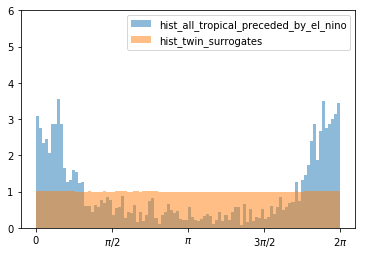

In [17]:
# All Tropical Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_tropical_preceded_by_el_nino')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

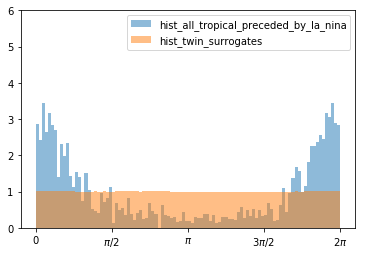

In [18]:
# All Tropical Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_tropical_preceded_by_la_nina')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

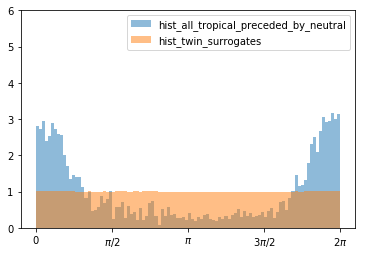

In [19]:
# All Tropical Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_tropical_preceded_by_neutral')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

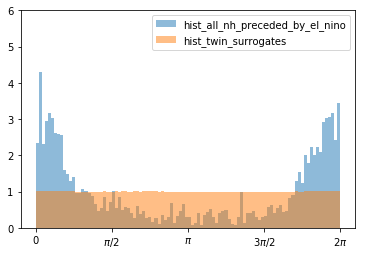

In [20]:
# All NH Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_nh_preceded_by_el_nino')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

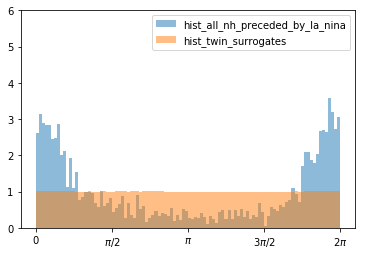

In [21]:
# All NH Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_nh_preceded_by_la_nina')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

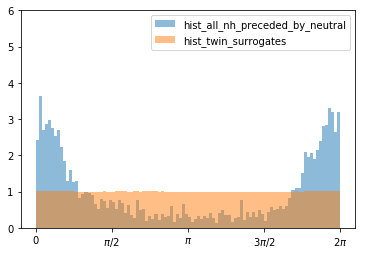

In [22]:
# All NH Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_nh_preceded_by_neutral')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

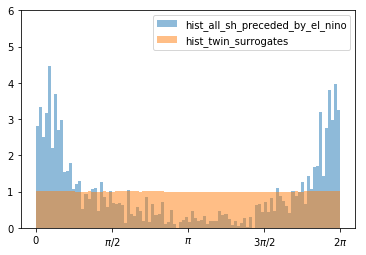

In [23]:
# All SH Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_sh_preceded_by_el_nino')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

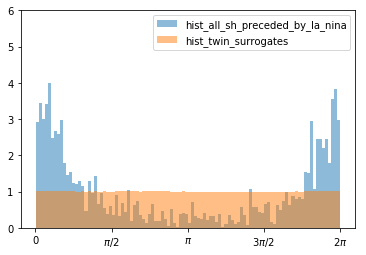

In [24]:
# All SH Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_sh_preceded_by_la_nina')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()

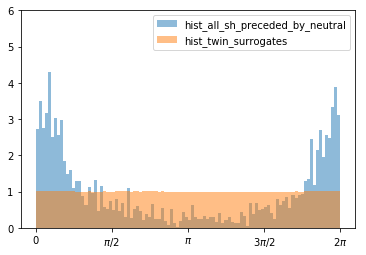

In [25]:
# All SH Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

#plt.figure(figsize=(20,10))
values_pi, bins_hist, _ = plt.hist(delphi_hist_dist_2/(2*np.pi), normed=True, bins=100, alpha=0.5, label='hist_all_sh_preceded_by_neutral')
_, _, _ = plt.hist(delphi_hist_null_wrap/(2*np.pi), normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates')
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
plt.ylim([0, 6])
plt.legend()